# **Using Statsmodels Library for Time Series Analysis of Monthly Electricity/Gas Prices and Weather Temperature in South Florida**




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Average Price: Electricity per Kilowatt-Hour in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72610.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72610


In [ ]:
file_path = 'APUS35B72610.csv'
electricity = pd.read_csv(file_path,index_col='DATE', parse_dates=True)
electricity.index.freq = 'MS'

In [ ]:
electricity

,APUS35B72610
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
electricity.rename(columns={'APUS35B72610': 'ELECTRICITY'}, inplace=True)

In [ ]:
electricity.dtypes

ELECTRICITY    object
dtype: object

In [ ]:
electricity['ELECTRICITY'] = pd.to_numeric(electricity['ELECTRICITY'], errors='coerce')

In [ ]:
electricity[electricity.isnull().any(axis=1)]

,ELECTRICITY
DATE,
1985-09-01,NaN
2019-09-01,NaN


In [ ]:
electricity.interpolate(method='time', inplace=True)

In [ ]:
electricity.isnull().sum()

ELECTRICITY    0
dtype: int64

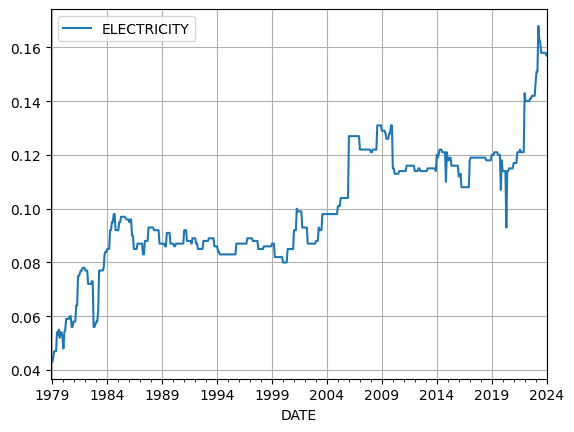

In [ ]:
electricity.plot()
plt.grid(True)

**12 Month Simple Moving Average (Electricity Price)**

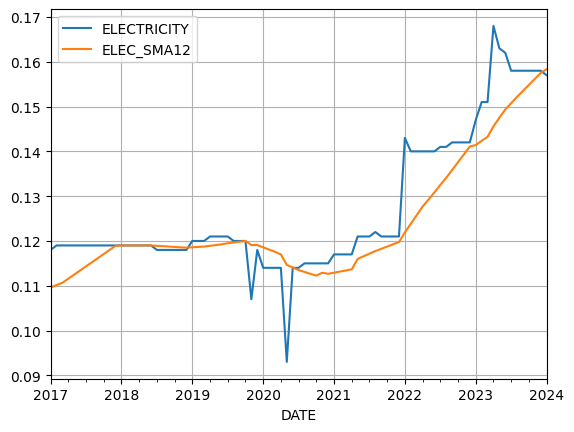

In [ ]:
electricity['ELEC_SMA12'] = electricity['ELECTRICITY'].rolling(window=12).mean()
electricity[['ELECTRICITY', 'ELEC_SMA12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

**Exponentially Weighted Moving Average With A Span Of 12 Using SimpleExpSmoothing Function (Electricity Price)**

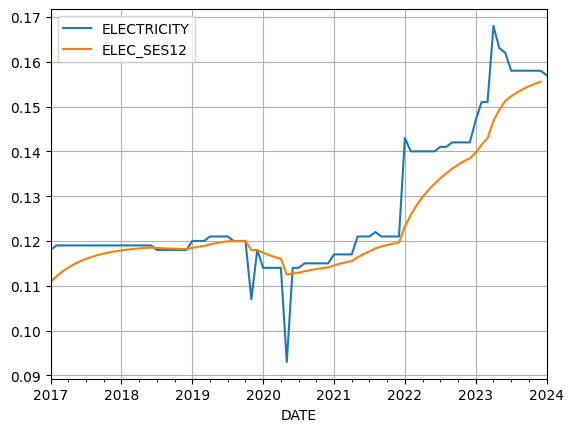

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

electricity['ELEC_SES12'] = SimpleExpSmoothing(electricity['ELECTRICITY']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
electricity[['ELECTRICITY', 'ELEC_SES12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

**Holt-Winters Fitted Model Using Triple Exponential Smoothing With Multiplicative Models (Electricity Price)**

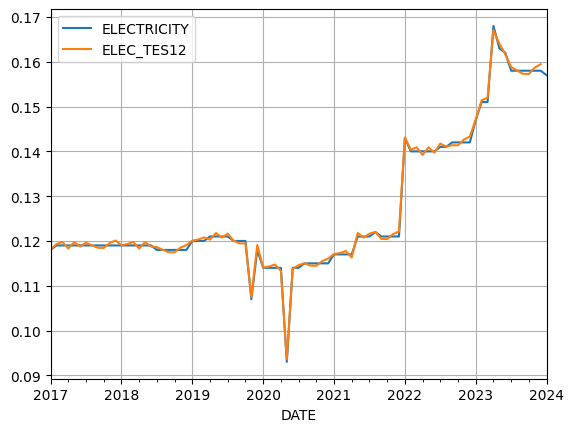

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

electricity['ELEC_TES12'] = ExponentialSmoothing(electricity['ELECTRICITY'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
electricity[['ELECTRICITY', 'ELEC_TES12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

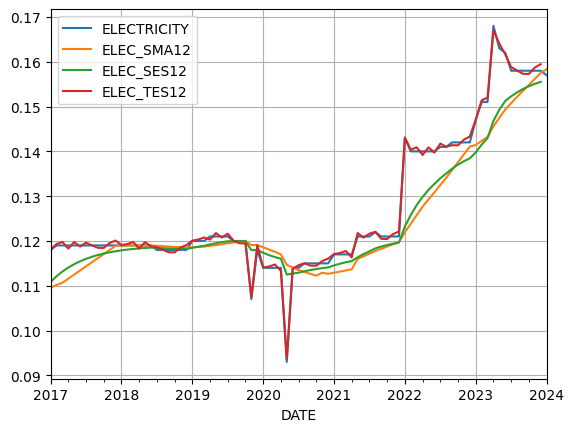

In [ ]:
electricity['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

In [ ]:
electricity.fillna(0, inplace=True)
electricity['2017-01-01':'2024-01-01']

,ELECTRICITY,ELEC_SMA12,ELEC_SES12,ELEC_TES12
DATE,,,,
2017-01-01,0.118,0.109583,0.110856,0.118075
2017-02-01,0.119,0.110167,0.112109,0.119309
2017-03-01,0.119,0.110667,0.113169,0.119776
2017-04-01,0.119,0.111583,0.114066,0.118309
2017-05-01,0.119,0.112500,0.114825,0.119754
...,...,...,...,...
2023-09-01,0.158,0.153500,0.153913,0.157308
2023-10-01,0.158,0.154833,0.154542,0.157268
2023-11-01,0.158,0.156167,0.155074,0.158706


**Average Price: Utility (Piped) Gas per Therm in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72620.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72620

In [ ]:
file_path2 = 'APUS35B72620.csv'
gas = pd.read_csv(file_path2,index_col='DATE', parse_dates=True)
gas.index.freq = 'MS'

In [ ]:
gas

,APUS35B72620
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
gas.rename(columns={'APUS35B72620': 'GAS'}, inplace=True)

In [ ]:
gas.dtypes

GAS    object
dtype: object

In [ ]:
gas['GAS'] = pd.to_numeric(gas['GAS'], errors='coerce')

In [ ]:
gas[gas.isnull().any(axis=1)]

,GAS
DATE,
1985-09-01,NaN
2012-10-01,NaN
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


In [ ]:
gas.interpolate(method='time', inplace=True)

In [ ]:
gas.isnull().sum()

GAS    0
dtype: int64

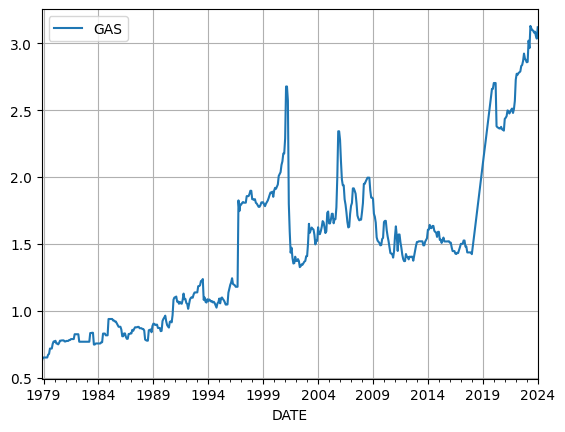

In [ ]:
gas.plot()
plt.grid(True)

**12 Month Simple Moving Average (Gas Price)**







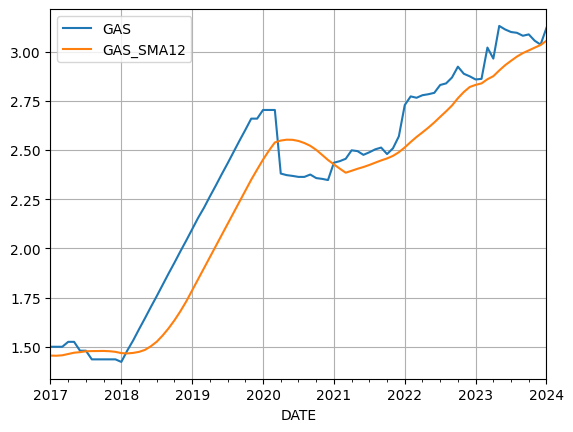

In [ ]:
gas['GAS_SMA12'] = gas['GAS'].rolling(window=12).mean()
gas[['GAS', 'GAS_SMA12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

**Exponentially Weighted Moving Average With A Span Of 12 Using SimpleExpSmoothing Function (Gas Price)**

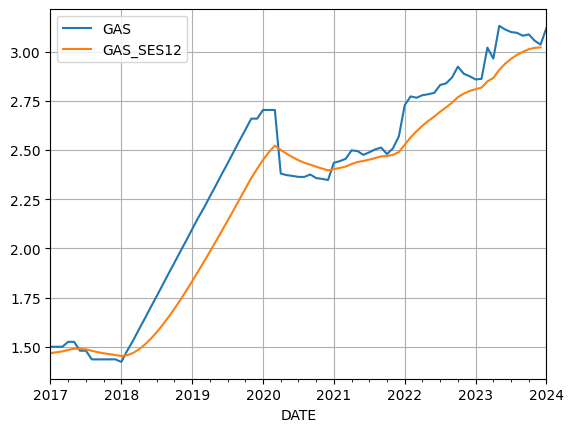

In [ ]:
gas['GAS_SES12'] = SimpleExpSmoothing(gas['GAS']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
gas[['GAS', 'GAS_SES12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

**Holt-Winters Fitted Model Using Triple Exponential Smoothing With Multiplicative Models (Electricity Price)**

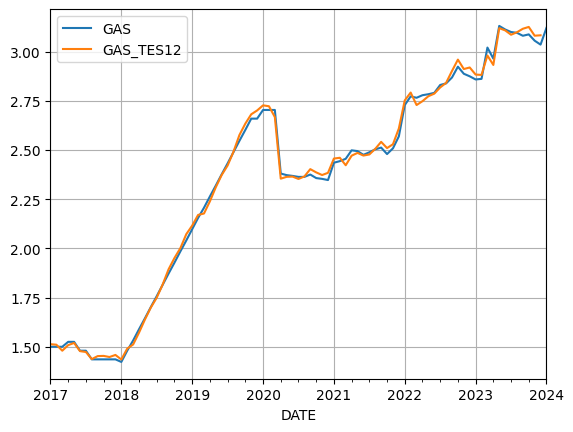

In [ ]:
gas['GAS_TES12'] = ExponentialSmoothing(gas['GAS'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
gas[['GAS', 'GAS_TES12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

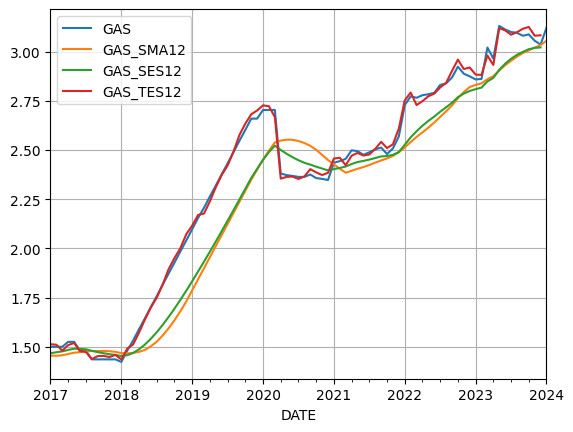

In [ ]:
gas['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

In [ ]:
gas.fillna(0, inplace=True)
gas['2017-01-01':'2024-01-01']

,GAS,GAS_SMA12,GAS_SES12,GAS_TES12
DATE,,,,
2017-01-01,1.500,1.455167,1.467153,1.513024
2017-02-01,1.500,1.454417,1.472206,1.510538
2017-03-01,1.500,1.456667,1.476482,1.479983
2017-04-01,1.525,1.463250,1.483946,1.508360
2017-05-01,1.525,1.469833,1.490262,1.519433
...,...,...,...,...
2023-09-01,3.080,2.991917,2.998082,3.115586
2023-10-01,3.087,3.005583,3.011761,3.124848
2023-11-01,3.055,3.019583,3.018413,3.080347


**Monthly Average Weather Readings for South Florida**

**From https://dev.meteostat.net/**




In [ ]:
# Install the meteostat package
!pip install meteostat
from meteostat import Stations
from datetime import datetime
from meteostat import Monthly

In [ ]:
# Define latitude and longitude for Miami
latitude = 25.7617
longitude = -80.1918

In [ ]:
# Get nearby weather stations in Florida
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)  # Fetch data for the closest station

In [ ]:
# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
72202,Miami International Airport,US,FL,72202,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2024-02-26,1948-01-01,2024-12-30,1948-01-01,2022-01-01,12735.283267


In [ ]:
# Set the station ID and time period
station_id = '72202' # Station ID for weather station near/in Miami
start = datetime(2007, 1, 1)
end = datetime(2023, 12, 30)

In [ ]:
# Get Monthly data for the specified station
data = Monthly(station_id, start, end)
weather = data.fetch()

In [ ]:
# Handle missing values
weather = weather.fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Month and Year from the index
weather['month'] = weather.index.month
weather['year'] = weather.index.year

In [ ]:
weather = weather.rename(columns={'tavg': 'AVG_TEMP'})

In [ ]:
weather.reset_index(inplace=True)
weather.rename(columns={'time': 'DATE'}, inplace=True)
weather.set_index('DATE', inplace=True)

In [ ]:
weather = weather[['AVG_TEMP', 'year', 'month']]

In [ ]:
# Sort data in descending order by time

weather.sort_index(axis=1)

# Calculate mean only for numeric columns
numeric_mean = weather.mean(numeric_only=True)

In [ ]:
weather.fillna(numeric_mean, inplace=True)

In [ ]:
# Print DataFrame
print(weather)
print(weather.dtypes)

# Save the DataFrame as a text file
#data.to_csv('weather_data.txt', sep='\t', index=False)
#data.to_excel('weather_data.xlsx', index=False)

from google.colab import files
# files.download('weather_data.txt')  # Download the text file
# files.download('weather_data.xlsx') # Download excel file

            AVG_TEMP  year  month
DATE                             
2007-01-01      22.5  2007      1
2007-02-01      20.6  2007      2
2007-03-01      23.2  2007      3
2007-04-01      23.8  2007      4
2007-05-01      25.9  2007      5
...              ...   ...    ...
2023-08-01      29.9  2023      8
2023-09-01      28.7  2023      9
2023-10-01      27.5  2023     10
2023-11-01      25.3  2023     11
2023-12-01      21.9  2023     12

[204 rows x 3 columns]
AVG_TEMP    float64
year          int64
month         int64
dtype: object


In [ ]:
weather.columns

Index(['AVG_TEMP', 'year', 'month'], dtype='object')

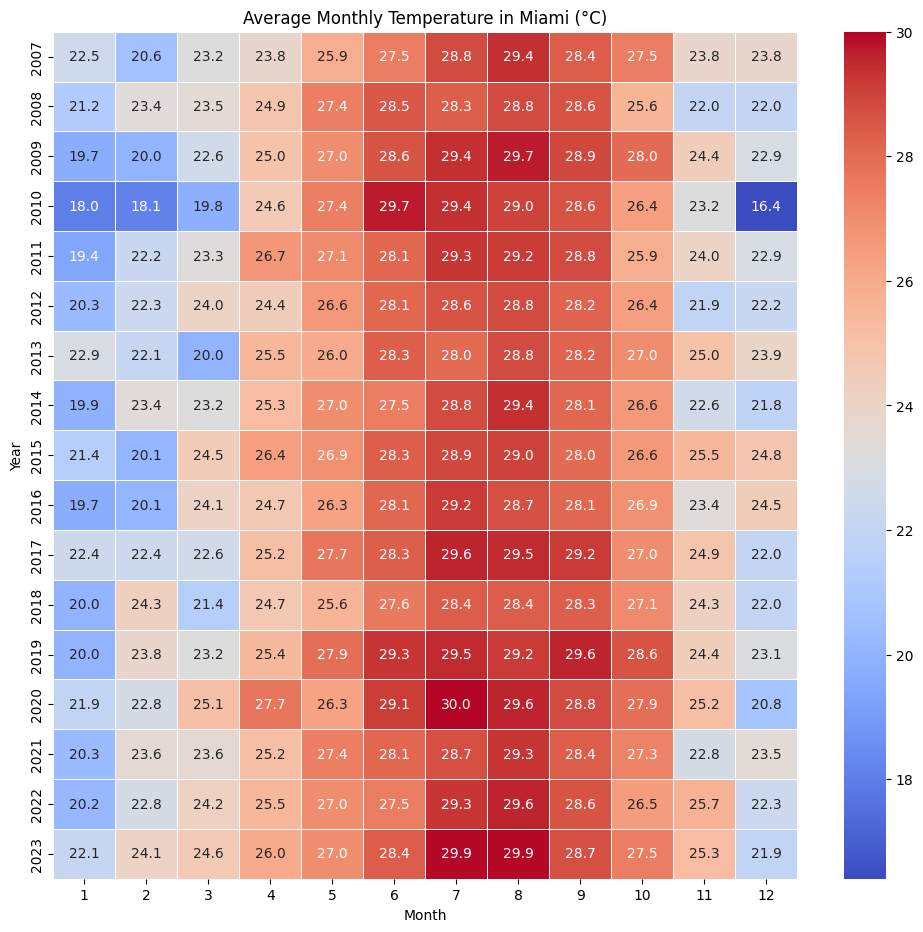

In [ ]:
# Pivot the DataFrame for the heatmap
pivot_df = weather.pivot_table(index='year', columns='month', values='AVG_TEMP', aggfunc='mean')
plt.figure(figsize=(12, 11))
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Monthly Temperature in Miami (°C)')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

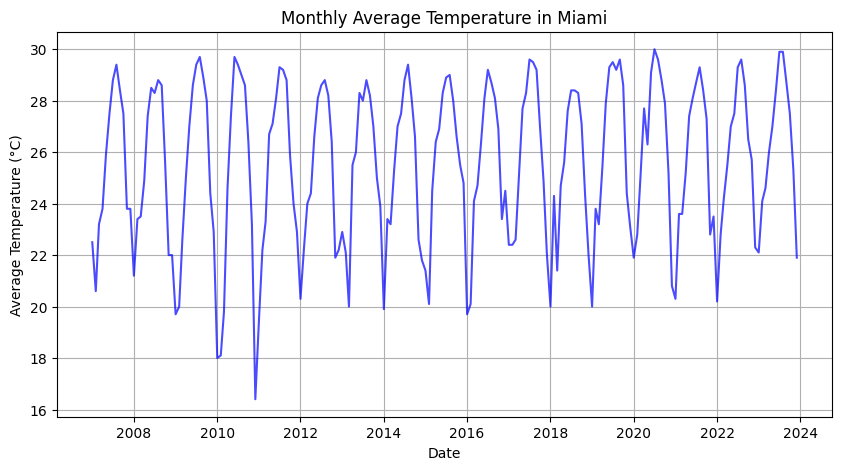

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(weather['AVG_TEMP'], color='blue', alpha=0.7)
plt.title('Monthly Average Temperature in Miami')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

**12 Month Simple Moving Average (Weather Temperature)**

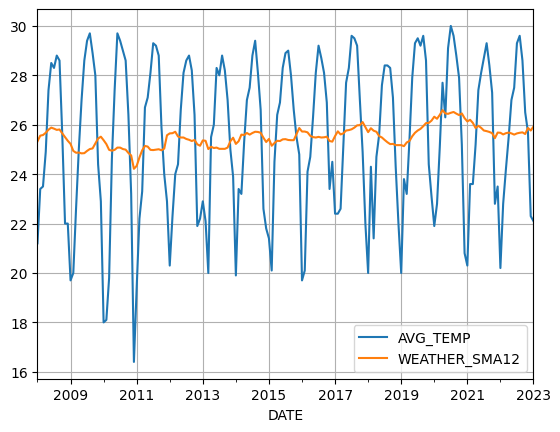

In [ ]:
weather['WEATHER_SMA12'] = weather['AVG_TEMP'].rolling(window=12).mean()
weather[['AVG_TEMP', 'WEATHER_SMA12']].loc['2008-01-01':'2023-01-01'].plot()
plt.grid(True)

**Exponentially Weighted Moving Average With A Span Of 12 Using SimpleExpSmoothing Function (Weather Temperature)**

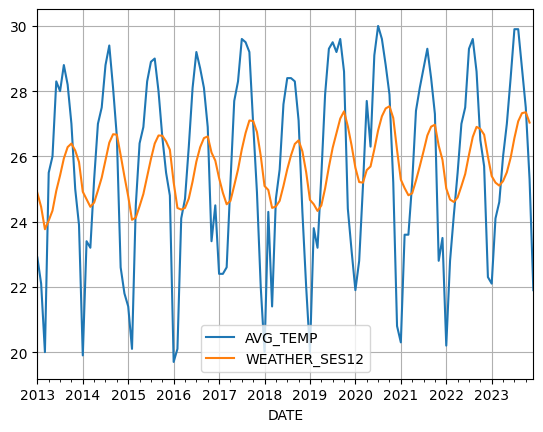

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

weather['WEATHER_SES12'] = SimpleExpSmoothing(weather['AVG_TEMP']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
weather[['AVG_TEMP', 'WEATHER_SES12']].loc['2013-01-01':'2024-01-01'].plot()
plt.grid(True)

**Holt-Winters Fitted Model Using Triple Exponential Smoothing With Multiplicative Models (Weather Temperature)**

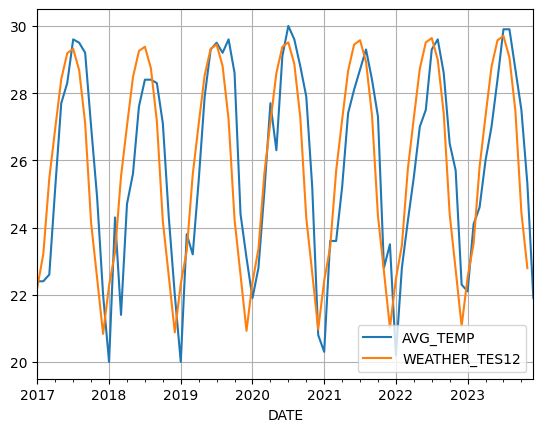

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

weather['WEATHER_TES12'] = ExponentialSmoothing(weather['AVG_TEMP'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
weather[['AVG_TEMP', 'WEATHER_TES12']].loc['2017-01-01':'2024-01-01'].plot()
plt.grid(True)

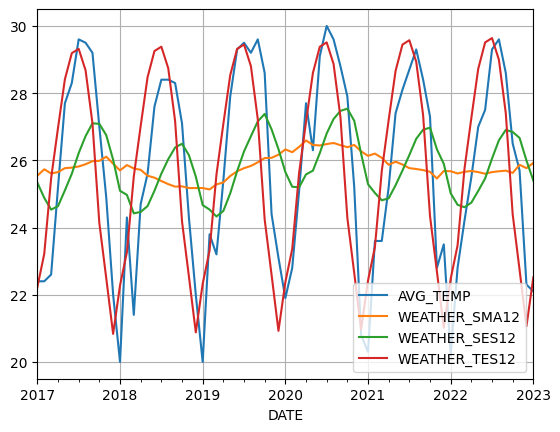

In [ ]:
weather[['AVG_TEMP', 'WEATHER_SMA12', 'WEATHER_SES12', 'WEATHER_TES12']]['2017-01-01':'2023-01-01'].plot()
plt.grid(True)

In [ ]:
weather.fillna(0, inplace=True)
weather[['AVG_TEMP', 'WEATHER_SMA12']]['2017-01-01':'2023-01-01']

,AVG_TEMP,WEATHER_SMA12
DATE,,
2017-01-01,22.4,25.541667
2017-02-01,22.4,25.733333
2017-03-01,22.6,25.608333
2017-04-01,25.2,25.650000
2017-05-01,27.7,25.766667
...,...,...
2022-09-01,28.6,25.691667
2022-10-01,26.5,25.625000
2022-11-01,25.7,25.866667


In [ ]:
weather[['AVG_TEMP', 'WEATHER_SES12']]['2017-01-01':'2023-01-01']

,AVG_TEMP,WEATHER_SES12
DATE,,
2017-01-01,22.4,25.336143
2017-02-01,22.4,24.884429
2017-03-01,22.6,24.532978
2017-04-01,25.2,24.635597
2017-05-01,27.7,25.107043
...,...,...
2022-09-01,28.6,26.904977
2022-10-01,26.5,26.842673
2022-11-01,25.7,26.666877


In [ ]:
weather[['AVG_TEMP', 'WEATHER_TES12']]['2017-01-01':'2023-01-01']

,AVG_TEMP,WEATHER_TES12
DATE,,
2017-01-01,22.4,22.226455
2017-02-01,22.4,23.214708
2017-03-01,22.6,25.463534
2017-04-01,25.2,26.966337
2017-05-01,27.7,28.412548
...,...,...
2022-09-01,28.6,27.401189
2022-10-01,26.5,24.394700
2022-11-01,25.7,22.741764
